The two les coastal.txt and arctic.txt (provided by Alf Harbitz, Institute of Marine Research)
 contain elliptic Fourier coe cients for standardized otolith (ear stone) shapes of coastal and arctic
 cod. The datasets are organised to have one otolith per row and one Fourier coe cient per column.
 These data can be used to make classi cation rules for the two populations of cod. We assume that
 the covariance matrices for the Fourier coe cients of the two populations are equal.
 Let p denote the true proportion of coastal cod in the sample. We rst assume equal costs of
 misclassi cation for the two populations.
 a) Find a classi cation rule based on the given datasets, also assuming equal prior probabilities.
 What is the apparent error rate using this rule?
 What is the estimated proportion p of coastal cod based on the classi cation?
 How does this value compare with the true value of p?
 b) Apply cross-validation (leave one out at a time), and compare the percentage of misclassi ca
tions with the result in a).
 Hint: Use the function lda(...., CV = TRUE)
 We will now use the following notation:
 paa = P(A A)=Probability of correct classi cation as arctic cod.
 pcc = P(C C)=Probability of correct classi cation as coastal cod.
 Nc = Number of otoliths classi ed as coastal.
 n = Total number of otoliths.
 c) The random variable Nc n will be a biased estimator of p. Show that the estimator
 Nc
 p =
 n 
(1 paa)
 pcc 
(1 paa)
 will be unbiased when the true values of paa and pcc are known.
 (Hint: Introduce a random indicator variable Xc which is equal to one if a random otolith is
 classi ed as coastal, otherwise 0. Then Nc = n
 i=1Xc.)
 d) Use the results from b) to estimate paa and pcc. Calculate p from the equation in c) and
 compare the result with Nc n as well as with the true value p. Comment on your result.
 e) We now assume that coastal cod is a more threatened stock than arctic cod and to re ect this
 we use the costs c(CA) = 2c(AC). Repeat exercise a) in this case.

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the working directory
PROJ_ROOT = os.path.join( os.pardir )
sys.path.append( PROJ_ROOT )
# Load the dataset
arctic_data_path = os.path.join(PROJ_ROOT,'data','raw', 'arctic.txt')
coastal_data_path = os.path.join(PROJ_ROOT,'data','raw', 'coastal.txt')
arctic = pd.read_csv(arctic_data_path, delimiter=' ', header=None, skipinitialspace=True)
coastal = pd.read_csv(coastal_data_path, delimiter=' ', header=None, skipinitialspace=True)

In [2]:
from src.features.build_features import explore_data

# Explore the data
explore_data(arctic)


Shape: (511, 37)
Head:          0         1         2         3         4         5         6   \
0  0.001128 -0.001135 -0.006612 -0.000851 -0.000908 -0.000579 -0.000436   
1 -0.002990 -0.000864  0.005002 -0.003011  0.006312  0.001690  0.002632   
2  0.006971  0.011285  0.008651 -0.004794  0.003475 -0.000987 -0.000824   
3 -0.019641  0.008287  0.000211 -0.001638  0.005827 -0.000671  0.003394   
4  0.005077  0.005935  0.002390 -0.008929  0.002033 -0.009061 -0.003477   

         7         8         9   ...        27        28        29        30  \
0  0.000010  0.001055  0.018435  ...  0.470435  0.013664 -0.009265 -0.004247   
1  0.002115 -0.000077  0.006771  ...  0.493054  0.023456 -0.000310 -0.006691   
2  0.002353  0.001564  0.006371  ...  0.428345 -0.001201 -0.015502 -0.007231   
3  0.002322  0.001346 -0.011866  ...  0.437201  0.010318 -0.001521  0.002177   
4 -0.001121  0.000918  0.017283  ...  0.436148  0.010243 -0.013756 -0.010129   

         31        32        33        34    

In [3]:
explore_data(coastal)

Shape: (464, 37)
Head:          0         1         2         3         4         5         6   \
0 -0.003899 -0.001270 -0.003596  0.000988 -0.002103 -0.001711 -0.000993   
1  0.006974  0.002849  0.003443 -0.009510 -0.003170 -0.002039  0.001290   
2 -0.002793 -0.002102  0.004956 -0.002516  0.001251 -0.000270  0.002850   
3 -0.004522  0.004127 -0.000114 -0.005561 -0.003717 -0.009547 -0.000720   
4 -0.013354 -0.005043  0.001129 -0.005418  0.002401 -0.001631 -0.002328   

         7         8         9   ...        27        28        29        30  \
0  0.001772 -0.000912  0.039029  ...  0.473571 -0.002449 -0.004998 -0.012370   
1  0.001610  0.000967 -0.003099  ...  0.433910  0.004323 -0.013555 -0.008335   
2 -0.000566  0.002526  0.003476  ...  0.417409  0.004671 -0.008522 -0.000415   
3 -0.003520 -0.000659 -0.021206  ...  0.427058  0.004284 -0.009376 -0.003157   
4  0.002942 -0.001656  0.021076  ...  0.470021  0.003943 -0.012063 -0.000741   

         31        32        33        34    

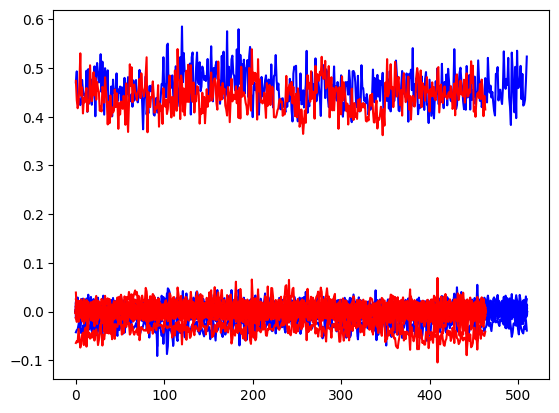

In [4]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(arctic, label='Arctic', color='blue')
ax.plot(coastal, label='Coastal', color='red')

In [5]:
# covariance plot using sns


From the plot we can see that it is not how to classify the data since both  have some variables with means around 0 and 0.45. 

In [6]:
# find col means and covariances for each dataset 
arctic_mean = arctic.mean()
coastal_mean = coastal.mean()
arctic_cov = arctic.cov()
coastal_cov = coastal.cov()

print(f" shape of arctic_mean: {arctic_mean.shape}")
print(f" shape of coastal_mean: {coastal_mean.shape}")
print(f" shape of arctic_cov: {arctic_cov.shape}")
print(f" shape of coastal_cov: {coastal_cov.shape}")

 shape of arctic_mean: (37,)
 shape of coastal_mean: (37,)
 shape of arctic_cov: (37, 37)
 shape of coastal_cov: (37, 37)


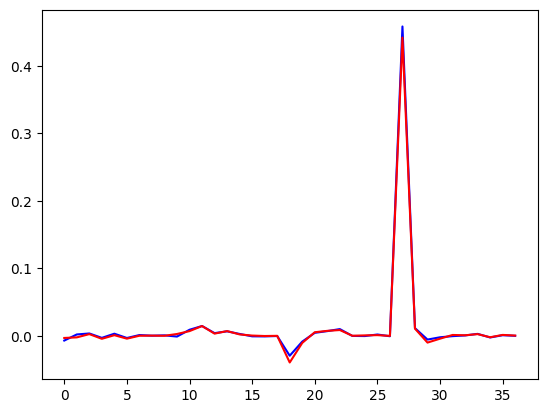

In [7]:
# plot the means
fig, ax = plt.subplots()
ax.plot(arctic_mean, label='Arctic', color='blue')
ax.plot(coastal_mean, label='Coastal', color='red')

In [9]:
from src.ecm import estimated_minimum_ecm
# calculate the estimated minimum error rate
error,_,_ = estimated_minimum_ecm(arctic,coastal)


Dataframe 1: n=511, p=37
Dataframe 2: n=464, p=37
Overall Error Rate: 0.5107692307692308
